# Palmer Penguins Dataset Analysis

****

![Penguins](https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png)

***

# Purpose

This notebook aims to explore and analyze the Palmer Penguins dataset to uncover insights about the relationships between the physical features of penguins and their species. Through this analysis, we will:

Load and inspect the dataset
Perform exploratory data analysis (EDA) to understand the distribution of various variables
Visualize key relationships between different features
Analyze the differences between penguin species in terms of physical attributes

### Dataset Overview
The dataset includes the following columns:

species: The species of the penguin (Adelie, Chinstrap, Gentoo)
island: The island where the penguin was observed
bill_length_mm: The length of the penguin's bill in millimeters
bill_depth_mm: The depth of the penguin's bill in millimeters
flipper_length_mm: The length of the penguin's flipper in millimeters
body_mass_g: The body mass of the penguin in grams
sex: The sex of the penguin (Male or Female)
By analyzing this dataset, we will explore how these variables are distributed across species and how physical characteristics like bill length, flipper length, and body mass differ between penguin species.

***

### Importing Libraries

In [6]:
# Data frames 
import pandas as pd
#Numerical arrays and random numbers
import numpy as np 
#Plot
import matplotlib.pyplot as plt
#statistical data visualization
import seaborn as sns
# Importing scikit-learn (sklearn) for machine learning tasks
import sklearn 

****

### Loading Data

In [7]:
# Load the penguins dataset.

df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

In [8]:
# Let's have an initial look. 
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [9]:
# Removing the rows with no values associated. 
dataset = df.dropna()
dataset

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [10]:
# Description fo the data
dataset.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


***

## Data Analysis and Visualization

[Text(0.5, 1.0, 'Penguins Species per Island')]

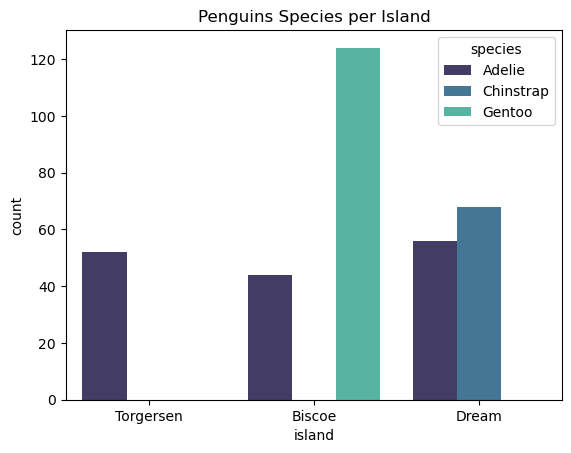

In [11]:
#Plot the bar chart

sns.countplot(data= df, x= 'island', hue='species', palette='mako').set(title='Penguins Species per Island')

In [13]:
bodymass = dataset['body_mass_g'].to_numpy()


Text(0, 0.5, 'count')

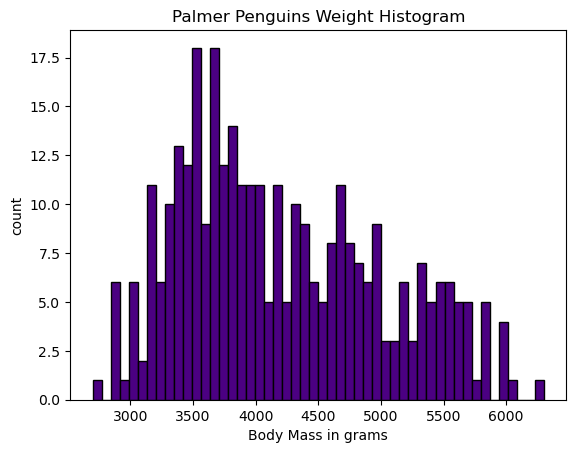

In [14]:
plt.hist(bodymass, bins=50, color='indigo', edgecolor= 'black')
# create title
plt.title('Palmer Penguins Weight Histogram')
# name axis
plt.xlabel('Body Mass in grams') 
plt.ylabel('count')